In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

df = pd.read_csv("states_all.csv")
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


In [2]:
sutunlar = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

In [3]:
eyaletler = df["STATE"].unique()
for eyalet in eyaletler:
    df.loc[df["STATE"] == eyalet, sutunlar] =df.loc[df["STATE"] == eyalet, sutunlar].interpolate()

df.dropna(inplace=True)

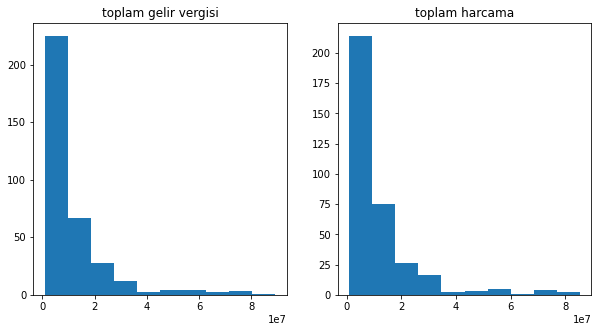

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(df['TOTAL_REVENUE'])
plt.title('toplam gelir vergisi')

plt.subplot(122)
plt.hist(df['TOTAL_EXPENDITURE'])
plt.title('toplam harcama')

plt.show()

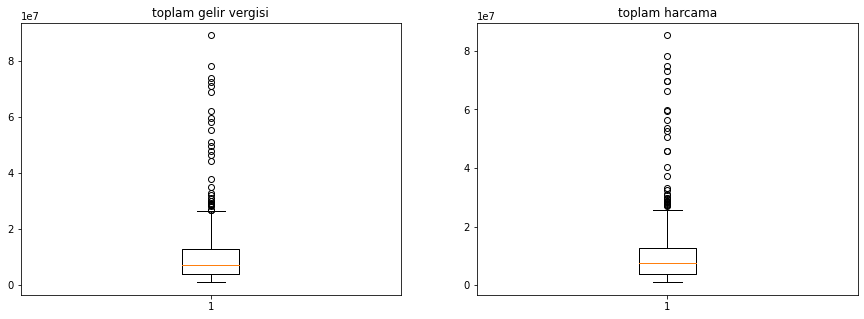

In [5]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["TOTAL_REVENUE"])
plt.title('toplam gelir vergisi')

plt.subplot(1,2,2)
plt.boxplot(df["TOTAL_EXPENDITURE"])
plt.title('toplam harcama')
plt.show()

In [6]:
#temizlemeden önce bütçe açığı hesabı

In [7]:
butce_acigi = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
butce_acigi

408    -117350.0
410      81974.0
411     161455.0
412     798454.0
414     278798.0
          ...   
1846     29669.0
1853   -238246.0
1860   -288932.0
1899    -90069.0
1906     10440.0
Length: 348, dtype: float64

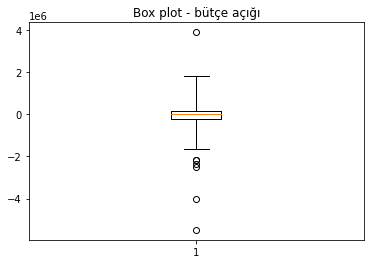

In [8]:
plt.boxplot(butce_acigi, whis = 5)
plt.title("Box plot - bütçe açığı")
plt.show()

In [9]:
#Bütçe açığı temizleme işlemi

In [10]:
winsorize_butce = winsorize(butce_acigi, (0.05, 0.05))

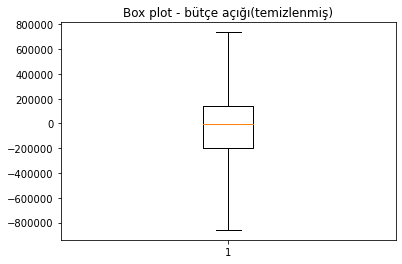

In [11]:
plt.boxplot(winsorize_butce, whis = 5)
plt.title("Box plot - bütçe açığı(temizlenmiş)")
plt.show()

In [12]:
# aşırı değerleri temizleme işlemi

In [13]:
winsorize_revenue = winsorize(df["TOTAL_REVENUE"], (0, 0.05))

winsorize_expenditure = winsorize(df["TOTAL_EXPENDITURE"], (0, 0.05))

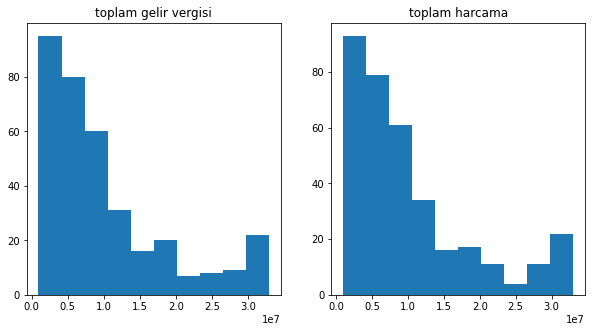

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(winsorize_revenue)
plt.title('toplam gelir vergisi')

plt.subplot(122)
plt.hist(winsorize_expenditure)
plt.title('toplam harcama')

plt.show()

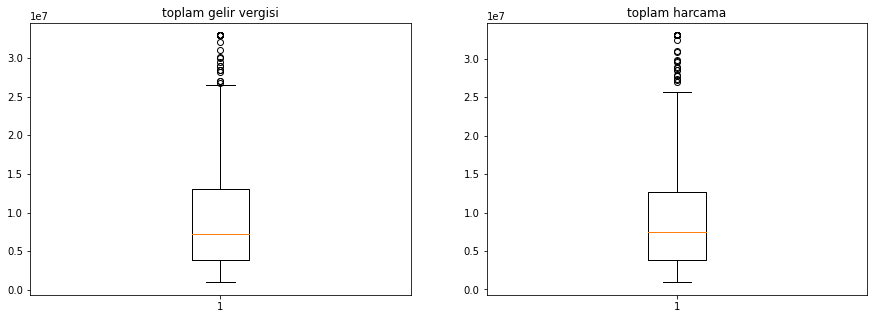

In [15]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorize_revenue)
plt.title('toplam gelir vergisi')

plt.subplot(1,2,2)
plt.boxplot(winsorize_expenditure)
plt.title('toplam harcama')
plt.show()

In [16]:
#temizledikten sonra bütçe açığı hesabı

In [17]:
butce_acigi2 = winsorize_revenue - winsorize_expenditure

Text(0.5, 1.0, 'Box plot - bütçe açığı 2')

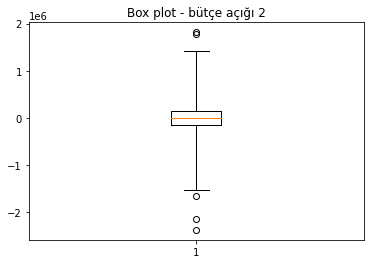

In [18]:
plt.boxplot(butce_acigi2, whis = 5)
plt.title("Box plot - bütçe açığı 2")

In [19]:
winsorize_butce2 = winsorize(butce_acigi2, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot - bütçe açığı 2(temizlenmiş)')

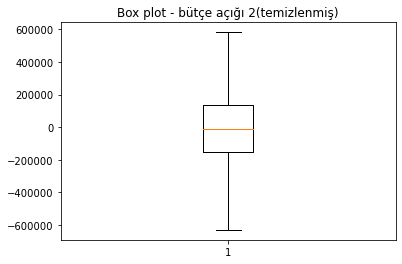

In [20]:
plt.boxplot(winsorize_butce2, whis = 5)
plt.title("Box plot - bütçe açığı 2(temizlenmiş)")

In [21]:
pd.DataFrame({"orijinal_butce": butce_acigi, "winsorize_butce": winsorize_butce,
              "winsorize_butce2": winsorize_butce2}).describe()

,orijinal_butce,winsorize_butce,winsorize_butce2
count,3.480000e+02,348.000000,348.000000
mean,-5.929094e+04,-33136.600575,-15332.718391
std,6.489083e+05,364727.409939,291060.990165
min,-5.487742e+06,-858603.000000,-630307.000000
25%,-2.007532e+05,-200753.250000,-153682.500000
50%,-6.484000e+03,-6484.000000,-10374.000000
75%,1.437272e+05,143727.250000,138657.250000
max,3.897129e+06,736272.000000,581734.000000
